In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import qp
import individual_metrics as inmet
import skgof
%matplotlib inline

In [2]:
func1 = ss.norm(loc=3.0,scale=0.5)
x = np.arange(0.5,10.0,0.02)
y1 = func1.pdf(x)*20000./0.25*0.1
func2= ss.norm(loc=5.0,scale=0.35)
y2 = func2.pdf(x)*40000./0.35*0.1


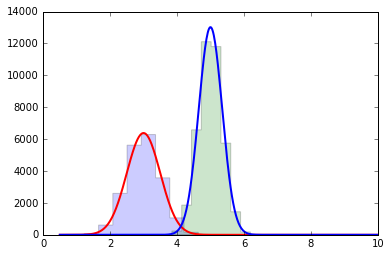

In [3]:
samples1 = np.array(func1.rvs(size=20000))
samples2 = np.array(func2.rvs(size=40000))
plt.hist(samples1, normed=False, histtype='stepfilled', alpha=0.2)
plt.hist(samples2, normed=False, histtype='stepfilled', alpha=0.2)
plt.plot(x,y1,lw=2,c='r')
plt.plot(x,y2,lw=2,c='b')

In [4]:
bigsample = np.append(samples1,samples2)
print len(bigsample)

60000


In [5]:
smallgrid=np.zeros([2,len(y1)])
smallgrid[0,:] = y1
smallgrid[1,:] = y2
approx_pdf = qp.Ensemble(smallgrid.shape[0],gridded=(x,smallgrid))

made the pool of 4 in 0.0368738174438
made the catalog in 0.0178170204163


In [6]:
nzobj = inmet.NzSumEvaluateMetric(approx_pdf,bigsample,eval_grid=x,using='gridded',dx=0.0001)

In [7]:
ks_stat,ks_pval = nzobj.NZKS()

In [8]:
print ks_stat
print ks_pval

0.164346210098
0.101166957639


In [9]:
cvm_stat,cvm_pval = nzobj.NZCVM()
print cvm_stat
print cvm_pval

557.461080355
0.133690352499


In [38]:
ad_stat,ad_pval = nzobj.NZAD(vmin = 2.0, vmax=5.0)
print ad_stat
print ad_pval

using 2.000000 and 5.000000 for vmin and vmax

7190.56074879
3.07093868113e-08


In [10]:
ad_stat,ad_pval = nzobj.NZAD(vmin = 1.0, vmax=6.0)
print ad_stat
print ad_pval

using 1.000000 and 6.000000 for vmin and vmax

2549.70661698
1.00135182368e-08


In [11]:
nzobj = inmet.NzSumEvaluateMetric(approx_pdf,bigsample,eval_grid=x,using='gridded',dx=0.005)

In [36]:
ad_stat,ad_pval = nzobj.NZAD(vmin=0.0,vmax =19.0 )
print ad_stat
print ad_pval

using 0.000000 and 19.000000 for vmin and vmax

7609.28715303
3.00000000397e-08


In [37]:
ad_stat,ad_pval = nzobj.NZAD(vmin=3.0,vmax =4.5 )
print ad_stat
print ad_pval

using 3.000000 and 4.500000 for vmin and vmax

2925.08511545
6.01383181031e-08


# test calculation of KL divergence, need to create a qp.PDF object from the samples

Created a KDE interpolator for the samples parametrization.
interpolating between 0.80790934911 and 6.48511658233 using samples
Plotted samples


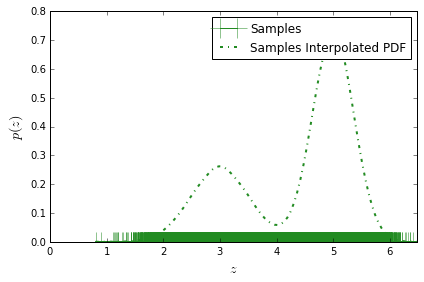

In [18]:
samplepdf = qp.PDF(samples=bigsample)
samplepdf.plot()

In [19]:
print nzobj.stackpz

In [20]:
kldtest = qp.utils.calculate_kl_divergence(samplepdf,nzobj.stackpz,limits=(0.0,8.0),dx=0.0001,vb=True)

Created a KDE interpolator for the samples parametrization.
interpolating between 0.0 and 7.9999 using samples
almost normalized integrals
Created a `linear` interpolator for the gridded parametrization.
interpolating between 0.0 and 7.9999 using gridded
almost normalized integrals


In [21]:
print kldtest

0.0563963487573


In [22]:
kldtestx = qp.utils.calculate_kl_divergence(samplepdf,nzobj.stackpz,limits=(0.0,8.0),dx=0.005,vb=True)

Created a KDE interpolator for the samples parametrization.
interpolating between 0.0 and 7.995 using samples
almost normalized integrals
Created a `linear` interpolator for the gridded parametrization.
interpolating between 0.0 and 7.995 using gridded
almost normalized integrals


In [23]:
print kldtestx

0.0563972803876


In [24]:
kldtestxx = qp.utils.calculate_kl_divergence(samplepdf,nzobj.stackpz,limits=(0.0,8.0),dx=0.05,vb=True)

Created a KDE interpolator for the samples parametrization.
interpolating between 0.0 and 7.95 using samples
almost normalized integrals
Created a `linear` interpolator for the gridded parametrization.
interpolating between 0.0 and 7.95 using gridded
almost normalized integrals


In [25]:
print kldtestxx

0.0563997144113


Not super sensitive to dx!

compare to a pdf created only from one of the two Gaussians, the first 20,000 read in as samples

In [26]:
badpdftest = qp.PDF(samples=bigsample[:20000])

Created a KDE interpolator for the samples parametrization.
interpolating between 0.80790934911 and 5.06027354651 using samples
Plotted samples


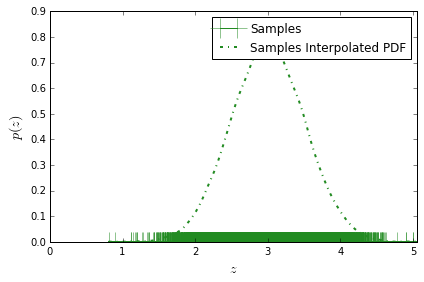

In [27]:
badpdftest.plot()

In [28]:
kldtest = qp.utils.calculate_kl_divergence(badpdftest,nzobj.stackpz,limits=(0.0,8.0),dx=0.001,vb=True)

Created a KDE interpolator for the samples parametrization.
interpolating between 0.0 and 7.999 using samples
almost normalized integrals
Created a `linear` interpolator for the gridded parametrization.
interpolating between 0.0 and 7.999 using gridded
almost normalized integrals


In [29]:
print kldtest

0.661561839118
